### Principle Component Analysis from Scratch

#### This notebook walks through the idea behind principle component analysis and shows step by step process behind the scenes.
##### It also shows the implementation with Scikit-learn.

##### This tutoal is based on:  https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

#### Import libraries

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [3]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Define X and y

In [8]:
# Set up X and y as matrices
X = df.iloc[:,:4].values
y = df.iloc[:, -1].values

In [12]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'], dtype='object')

#### Data visualization

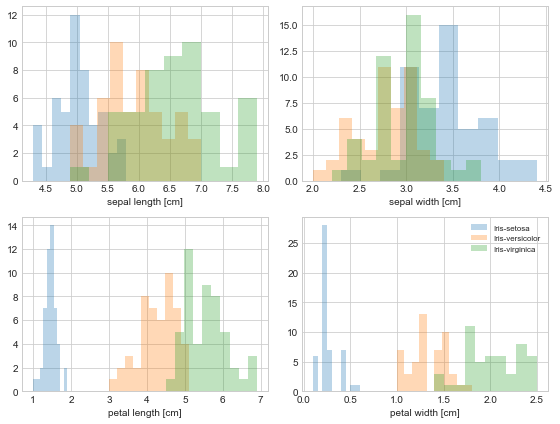

In [15]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

#### Standardize the data

In [19]:
X_std = StandardScaler().fit_transform(X)

#### Calculate the covariance matrix

In [28]:
# Calculate mean for each COLUMN in X
mean_vec = np.mean(X_std, axis = 0)

In [29]:
# Calculate the covariance of X (feature matrix)
m = len(X) # No.instances 
cov_mat = 1/(m-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

In [30]:
print('Covariance matrix \n%s' %cov_mat)
# Covariance matrix is (n x n) , n: features

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [31]:
# We could also use np.cov to calculate covariance matrix directly

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


#### Apply eigendecomposition on covariance matrix

In [32]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [33]:
# Eigenvalue decomposition based on correlation matrix
# Same results as above

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


#### While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same.

In [34]:
u,s,v = np.linalg.svd(X_std.T)

In [35]:
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [37]:
s

array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839])

#### Sorting eigenpairs

#### The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code.

In [41]:
for i in eig_vecs:
    print(np.linalg.norm(i))

1.0
1.0
1.0
0.9999999999999998


#### Rank the eigenvalues

In [50]:
# Create a set with eigenvalues and eigenvectors

eig_pairs = [(np.abs(eig_vals[i]), np.abs(eig_vecs[:, i])) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse = True)

In [46]:
for i in range(len(eig_vecs)):
    print(eig_vecs[:,i])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]
[ 0.26199559 -0.12413481 -0.80115427  0.52354627]


In [52]:
# Confirm that eigenvalues are sorted in descending order
for i, j in eig_pairs:
    print(i)

2.9108180837520536
0.9212209307072253
0.14735327830509562
0.02060770723562562


#### Explained variance
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [55]:
total = sum(eig_vals)
variance_explained = [i/total for i in sorted(eig_vals, reverse = True)]
cumulative_variance_explain = np.cumsum(variance)

In [54]:
total

4.0

In [56]:
variance_explained

[0.7277045209380134,
 0.23030523267680633,
 0.036838319576273905,
 0.005151926808906405]

In [57]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

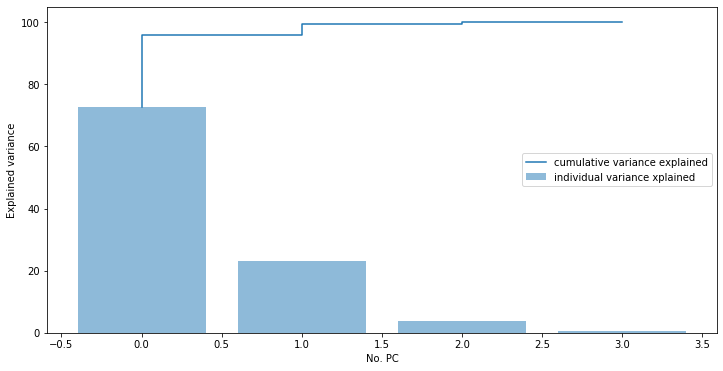

In [64]:
plt.figure(figsize= (12,6))

plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'individual variance xplained')
plt.step(range(4), cum_var_exp, label = 'cumulative variance explained')

plt.xlabel("No. PC")
plt.ylabel("Explained variance")
plt.legend(loc = 'best')
#plt.tight_layout()
plt.show()

#### The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

#### Projection matrix
Matrix of the top k eigenvectors

In [69]:
W = np.hstack((eig_pairs[0][1].reshape(4,1),
             eig_pairs[1][1].reshape(4,1)))

print("Matrix W:\n", W)

Matrix W:
 [[0.52237162 0.37231836]
 [0.26335492 0.92555649]
 [0.58125401 0.02109478]
 [0.56561105 0.06541577]]


#### Project X onto the new feature space
In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [75]:
X_proj = X.dot(W)

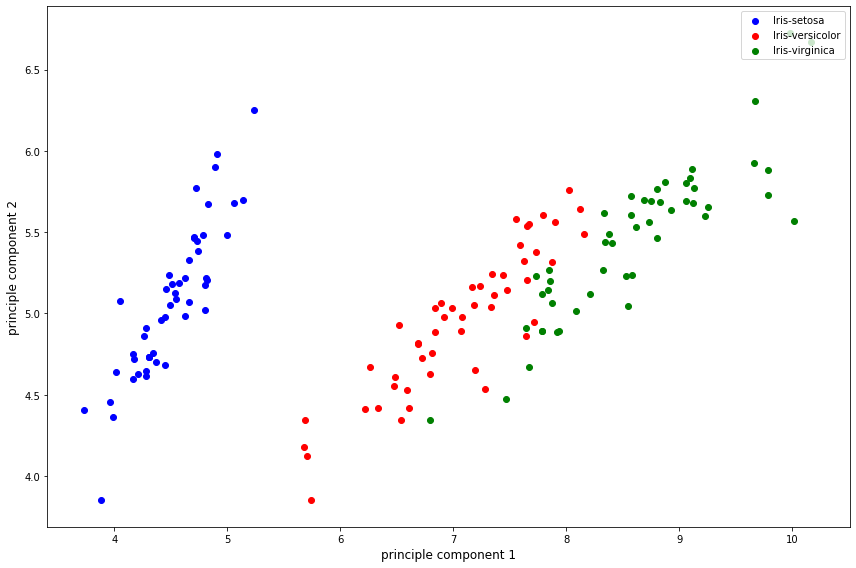

In [80]:
plt.figure(figsize = (12, 8))
for label, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
    plt.scatter(X_proj[y==label,0],
               X_proj[y==label, 1],
               label= label,
               c = col)
    
plt.xlabel("principle component 1", fontsize = 12)
plt.ylabel('principle component 2', fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#### PCA in Scikit-learn

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_std)

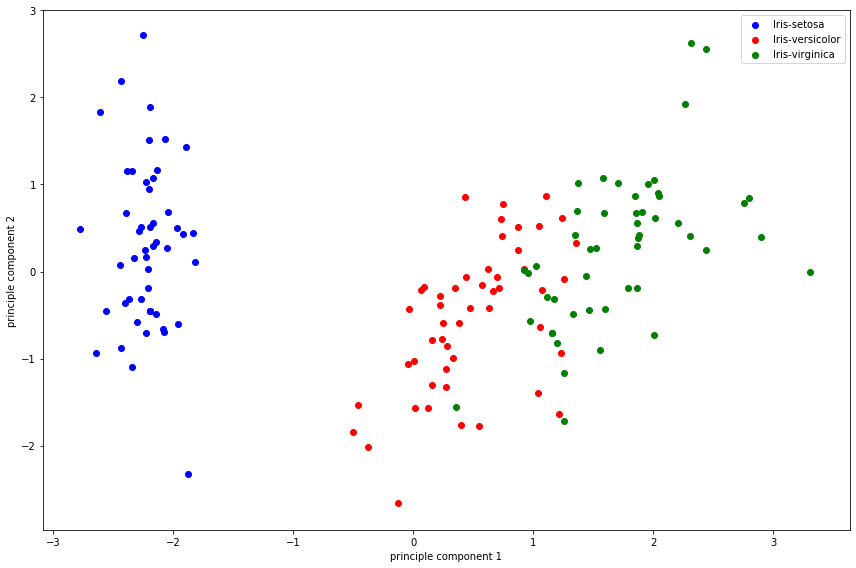

In [84]:
plt.figure(figsize = (12,8))
for label, color in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
    plt.scatter(X2D[y==label, 0],
               X2D[y==label, 1],
               label = label, 
               color = color)
    
    
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()